In [61]:
from environments.takeaway import utils as twy
from environments.takeaway.co_aa_takeaway import COAATakeaway
from argumentation.utils import construct_all_attacks, order_to_matrix
from argumentation.classes import ArgumentationFramework
from agents.co_aa_agent import COAAAgent
from utils import run_episode

import subprocess
import socket
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from tqdm.notebook import tqdm

In [62]:
def get_host(mode: str = 'recv', path = r"\\wsl$\Ubuntu-16.04\run\systemd\resolve\resolv.conf"):
    if mode == 'send':
        batcmd="wsl hostname -I"
        result = subprocess.check_output(batcmd, shell=True)
        return result.decode("utf-8").strip()
    else:
        f = open(path)
        for line in f:
            li=line.strip()
            if not li.startswith("#"):
                if line.rstrip().split(' ')[0] == 'nameserver':
                    return line.rstrip().split(' ')[1]                    

In [63]:
arg_actions = twy.arg_actions
args = list(arg_actions.keys())
# atts = construct_all_attacks(arg_actions)
# af = ArgumentationFramework(args, atts)

In [64]:


epsilon = 0.1
gamma = 0.99
alpha = 1e-3
agent = COAAAgent(alpha, gamma, epsilon, args)
ordering_path = r"\\wsl$\Ubuntu-16.04\home\candido\robocup\ORLA\ordering.txt"
send_host = get_host('send')
send_port = 7000
recv_host = get_host('recv')
recv_port = 7001


In [65]:
state = order_to_matrix([], args, True)


agent.w[state,args.index('TackleBall1')] = -1
agent.w[state,args.index('TackleBall2')] = -1
agent.w[state,args.index('TackleBall3')] = -1

agent.w[state,args.index('MinAngle1,3')] = -2
agent.w[state,args.index('MinAngle1,2')] = -2
agent.w[state,args.index('MinAngle1,4')] = -2
agent.w[state,args.index('MinAngle2,2')] = -2
agent.w[state,args.index('MinAngle2,3')] = -2
agent.w[state,args.index('MinAngle2,4')] = -2
agent.w[state,args.index('MinAngle3,2')] = -2
agent.w[state,args.index('MinAngle3,3')] = -2
agent.w[state,args.index('MinAngle3,4')] = -2

agent.w[state,args.index('MinDist1,3')] = -2
agent.w[state,args.index('MinDist1,2')] = -2
agent.w[state,args.index('MinDist1,4')] = -2
agent.w[state,args.index('MinDist2,2')] = -2
agent.w[state,args.index('MinDist2,3')] = -2
agent.w[state,args.index('MinDist2,4')] = -2
agent.w[state,args.index('MinDist3,2')] = -2
agent.w[state,args.index('MinDist3,3')] = -2
agent.w[state,args.index('MinDist3,4')] = -2

agent.w[state,args.index('OpenKeeper1,2')] = -3
agent.w[state,args.index('OpenKeeper1,3')] = -3
agent.w[state,args.index('OpenKeeper1,4')] = -3
agent.w[state,args.index('OpenKeeper2,2')] = -3
agent.w[state,args.index('OpenKeeper2,3')] = -3
agent.w[state,args.index('OpenKeeper2,4')] = -3
agent.w[state,args.index('OpenKeeper3,2')] = -3
agent.w[state,args.index('OpenKeeper3,3')] = -3
agent.w[state,args.index('OpenKeeper3,4')] = -3

agent.w[state,args.index('FarKeeper1,2')] = -4
agent.w[state,args.index('FarKeeper1,3')] = -4
agent.w[state,args.index('FarKeeper1,4')] = -4
agent.w[state,args.index('FarKeeper2,2')] = -4
agent.w[state,args.index('FarKeeper2,3')] = -4
agent.w[state,args.index('FarKeeper2,4')] = -4
agent.w[state,args.index('FarKeeper3,2')] = -4
agent.w[state,args.index('FarKeeper3,3')] = -4
agent.w[state,args.index('FarKeeper3,4')] = -4

agent.w *= 0.1

In [66]:
agent.epsilon = 0.3
agent.gamma = 0.95
agent.alpha = 1e-6

rewards = []


env = COAATakeaway(
    args,   
    send_host,
    send_port,
    recv_host,
    recv_port,
    ordering_path
)

t_episodes = tqdm(range(1, int(1e4)+1))
for episode in t_episodes:
    start_state = env.reset()
    end_state, reward, animation_data = run_episode(env, agent, start_state, is_learning=True, is_animating=False, is_rendering=False)
    rewards.append(reward)
    t_episodes.set_postfix({'avg': np.average(rewards[-100:]), 'last': rewards[-1]})
    # t_episodes.set_postfix({'avg': np.average(rewards), 'last': rewards[-1]})



  0%|          | 0/10000 [00:00<?, ?it/s]

Start sent
  Reward: -97.0
Start sent
  Reward: -59.0
Start sent
  Reward: -76.0
Start sent
  Reward: -99.0
Start sent
  Reward: -80.0
Start sent
  Reward: -90.0
Start sent
  Reward: -111.0
Start sent
  Reward: -91.0
Start sent
  Reward: -89.0
Start sent
  Reward: -101.0
Start sent
  Reward: -66.0
Start sent
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\omcan\AppData\Local\Temp\ipykernel_8348\2517608296.py", line 20, in <cell line: 18>
    end_state, reward, animation_data = run_episode(env, agent, start_state, is_learning=True, is_animating=False, is_rendering=False)
  File "d:\Thesis\RL-AA\src\utils.py", line 53, in run_episode
    next_state, reward, done, _ = env.step(current_action)
  File "d:\Thesis\RL-AA\src\environments\takeaway\co_aa_takeaway.py", line 68, in step
    reward = self._get_game_reward()
  File "d:\Thesis\RL-AA\src\environments\takeaway\co_aa_takeaway.py", line 92, in _get_game_reward
    reward, addr = s.recvfrom(16)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\omcan\miniconda3\envs\py39\lib\site-

In [11]:
agent.values(end_state)

array([  2.17306172,  25.08608043,  25.39540651,  14.62643872,
        21.63780768,  24.89973766,  26.01907084,  22.40739077,
        20.02282069,  23.53943852,  25.48328524,  16.69264145,
         9.48021497,   3.26109745,  24.75077581, -26.24007364,
        11.24912211,  -4.77764651,  24.45398891,  25.28754577,
        20.09549652,  15.48932662,  24.58538181,  26.15099705,
         2.08225081,  14.86161586,   4.55616232,  25.06397768,
        25.40613591,  20.64619505,   6.31521722,  25.08671061,
        25.285816  ,  23.47386277,  18.47553227,  24.44408074,
        25.35293735,  13.26418834,   7.72126587])

c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\omcan\miniconda3\envs\py39\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


[Text(0, 0.5, 'Reward')]

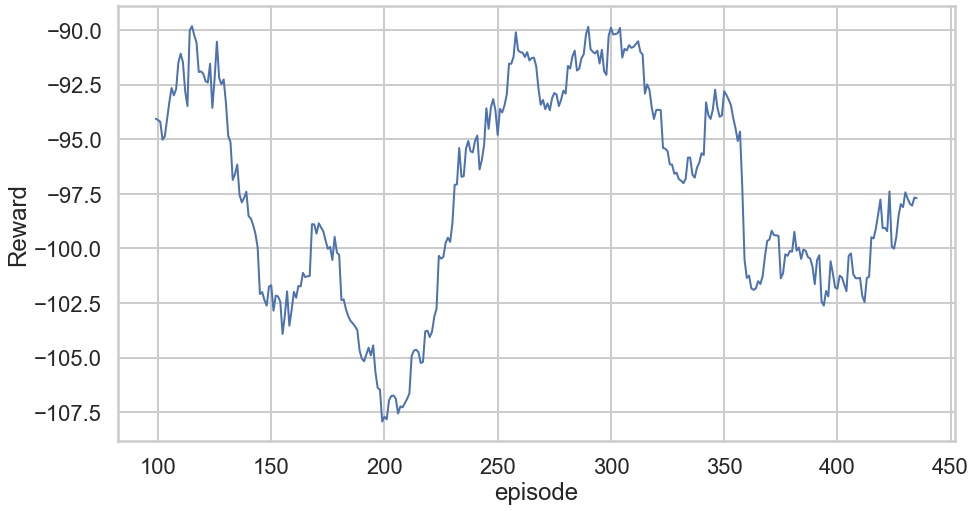

In [12]:
sns.set(rc = {'figure.figsize':(15,8)}, style='whitegrid')
sns.set_context("poster", rc={"lines.linewidth": 2}, font_scale=1)

df = pd.DataFrame(rewards, columns=['reward'])
df['reward_avg'] = df.transform(lambda x: x.rolling(100).mean())
df['episode'] = df.index
  
rewards_plot = sns.lineplot(x='episode', y='reward_avg', data=df, color="b")
# rewards_plot.set(ylim=(0, 1))
rewards_plot.set(ylabel="Reward")

# right_y = rewards_b_plot.axes.twinx()
# sns.lineplot(x='episode', y='acc_avg', data=eval_b, color="g", ax=right_y, ci='sd')
# plt.legend(loc='lower right', handles=[Line2D([], [], marker='_', color="b", label='Reward'), Line2D([], [], marker='_', color="g", label='Success ratio %')], facecolor='white')
# right_y.set(ylim=(lim*100 for lim in rewards_b_plot.get_ylim()))
# right_y.set(ylabel="Success ratio %")

# rewards_b_plot.set(xlabel="Episode")
# rewards_b_plot.set(xlim=(0, 1e6))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
